# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Multiple Input and Single Output

In [2]:
def neural_network(inputs,weights):
    assert(len(inputs) == len(weights))
    out = 0
    for i,j in zip(inputs,weights):
        out += i*j
    return out

In [3]:
def ele_mul(vector,scalar):
    out = []
    for i in vector:
        out.append(i*scalar)
    return out

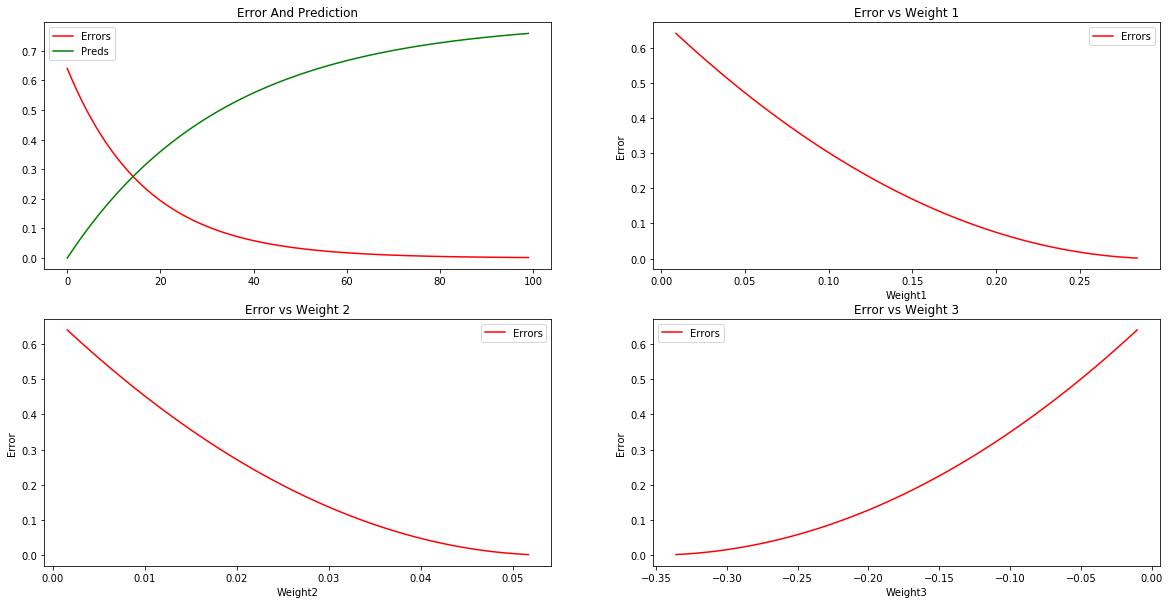

In [4]:
weights = [0.0,0.0,0.0]
inputs = [1.1,0.2,-1.3]
goal_pred = 0.8
# For Plotting Purposes
weight1 = []
weight2 = []
weight3 = []
errors = []
preds = []

for i in range(100):
    pred = neural_network(inputs=inputs,weights=weights)
    raw_error = pred - goal_pred
    error = (raw_error) ** 2
    errors.append(error)
    preds.append(pred)
    delta_weight = ele_mul(vector=inputs,scalar=raw_error) #Sensitivilty of error wrt each weight
    weights[0] -= 0.01*delta_weight[0]
    weight1.append(weights[0])
    weights[1] -= 0.01*delta_weight[1]
    weight2.append(weights[1])
    weights[2] -= 0.01*delta_weight[2]
    weight3.append(weights[2])
#     print("Error",error)
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
plt.plot(range(0,len(errors)),errors, 'r')
plt.plot(range(0,len(preds)),preds, 'g')
plt.legend(('Errors','Preds'))
plt.title('Error And Prediction')

plt.subplot(2,2,2)
plt.plot(weight1,errors, 'r')
plt.legend(('Errors','Preds'))
plt.title('Error vs Weight 1')
plt.xlabel('Weight1')
plt.ylabel('Error')

plt.subplot(2,2,3)
plt.plot(weight2,errors, 'r')
plt.legend(('Errors','Preds'))
plt.title('Error vs Weight 2')
plt.xlabel('Weight2')
plt.ylabel('Error')

plt.subplot(2,2,4)
plt.plot(weight3,errors, 'r')
plt.legend(('Errors','Preds'))
plt.title('Error vs Weight 3')
plt.xlabel('Weight3')
plt.ylabel('Error')

plt.show()

> Notice the xlabels of the Weight Vs Error graphs for each weight, they decrease but in different fashions

# Single Input and Multiple Outputs

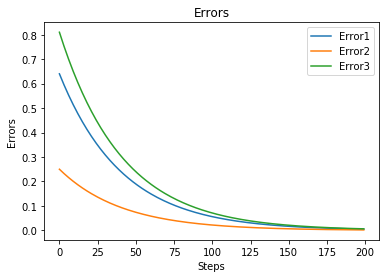

In [61]:
def neural_networks(inputs,weights):
    out = inputs * np.array(weights)
    return out
inputs = 1.1
weights = [0.0,0.0,0.0]
goal_preds = [0.8,0.5,0.9]
errors = []
for i in range(200):
    pred = neural_networks(inputs,weights) # an np array
    raw_error = pred - goal_preds          # an np array
    error = (raw_error) ** 2               # an np array
    delta_weight = raw_error * inputs *0.01# an np array
    weights = weights - delta_weight       # an np array
    errors.append(error)
plt.plot(range(0,len(errors)),errors)
plt.legend(('Error1','Error2','Error3'))
plt.xlabel("Steps")
plt.ylabel("Errors")
plt.title('Errors')
plt.show()

> The errors for different outputs going down

# Multiplt Inputs and Multiple Outputs

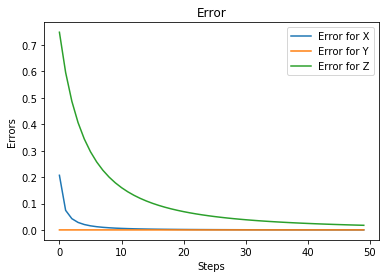

In [215]:
# Let there be three output nodes x,y,z
# Let there be three input nodes a,b,c
errors = []
weights = np.array([[0.1,0.1,0.0],[0.1,0.2,1.3],[-0.3,0.0,0.1]])
inputs = np.array([[8.5,0.65,1.2]])
goal_preds = np.array([[0.1,1,0.1]])
alpha = 0.01
for _ in range(50):
    preds = inputs @ weights          # @ symbol does matrix multiplication faster than the dot pdt or matmul
    raw_error = preds - goal_preds
    error = raw_error ** 2
    errors.append(error.flatten())
    del_error = error * inputs
    weights -= (alpha * del_error)
plt.plot(range(0,len(errors)),errors)
plt.legend(('Error for X','Error for Y','Error for Z'))
plt.xlabel("Steps")
plt.ylabel("Errors")
plt.title('Error')
plt.show()